First 5 rows:
         bmi  exercise_hours  junk_food_freq risk_level
0  28.730279              13               1       high
1  31.301442              12               4     medium
2  32.549043               9               0     medium
3  30.463670               2               1     medium
4  28.431755               2               1        low

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bmi             100 non-null    float64
 1   exercise_hours  100 non-null    int64  
 2   junk_food_freq  100 non-null    int64  
 3   risk_level      100 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB
None

Class distribution:
risk_level
medium    40
high      31
low       29
Name: count, dtype: int64


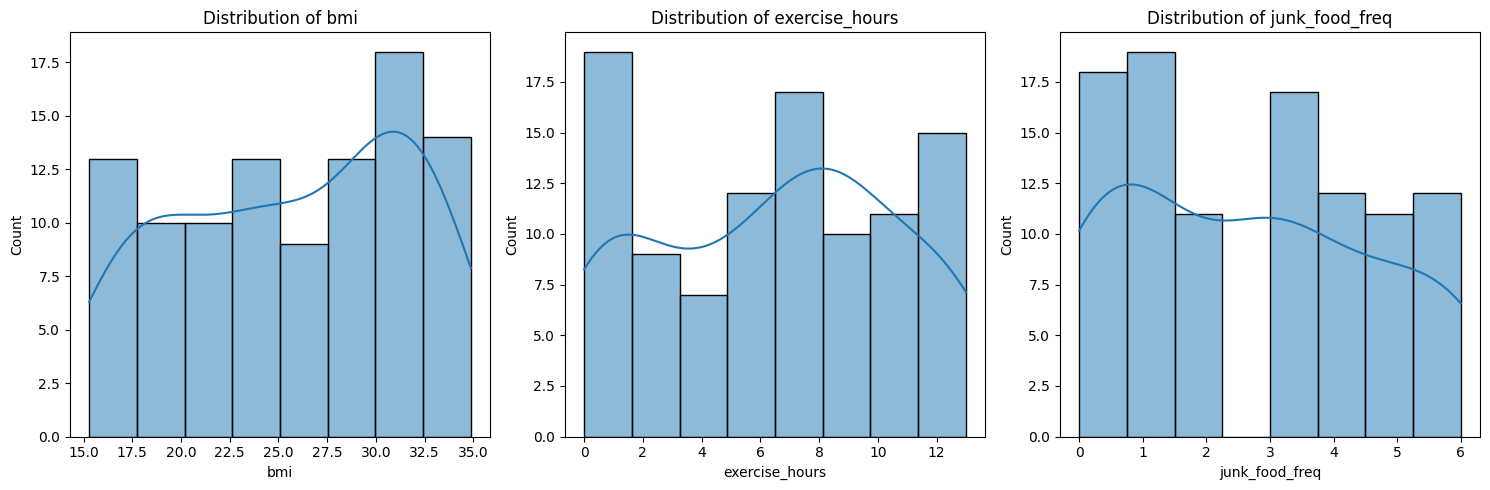


Classification Report:
              precision    recall  f1-score   support

         low       0.33      0.10      0.15        10
      medium       0.43      0.46      0.44        13
        high       0.15      0.29      0.20         7

    accuracy                           0.30        30
   macro avg       0.31      0.28      0.27        30
weighted avg       0.33      0.30      0.29        30


Accuracy: 0.3000
Precision: 0.3327
Recall: 0.3000
F1-Score: 0.2905


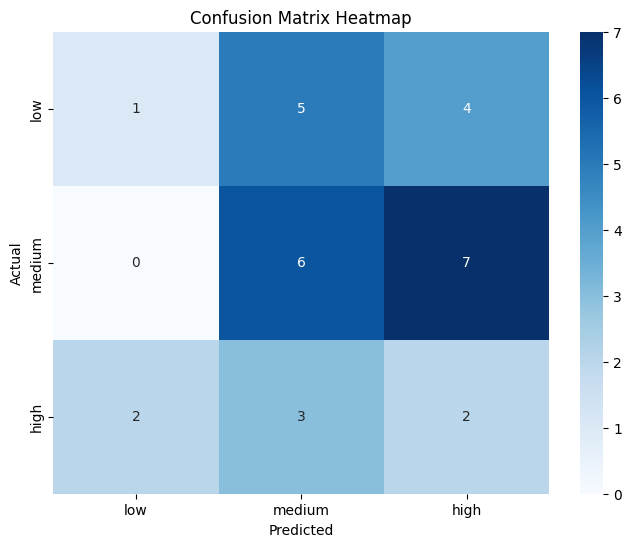

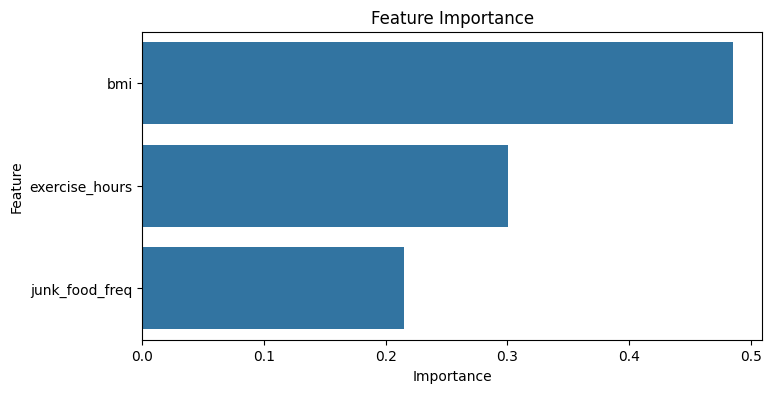

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

data = pd.read_csv('/content/health_risk2.csv')

print("First 5 rows:")
print(data.head())
print("\nDataset info:")
print(data.info())
print("\nClass distribution:")
print(data['risk_level'].value_counts())


plt.figure(figsize=(15, 5))
for i, col in enumerate(['bmi', 'exercise_hours', 'junk_food_freq']):
    plt.subplot(1, 3, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


data['risk_level'] = data['risk_level'].map({'low': 0, 'medium': 1, 'high': 2})


X = data[['bmi', 'exercise_hours', 'junk_food_freq']]
y = data['risk_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['low', 'medium', 'high']))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['low', 'medium', 'high'],
            yticklabels=['low', 'medium', 'high'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


feature_importance = pd.DataFrame({
    'Feature': ['bmi', 'exercise_hours', 'junk_food_freq'],
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()